>>># Old BIkes price prediction project

### importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as exp
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
import pickle
%matplotlib inline
print('library has been imported')

library has been imported


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Used_Bikes.csv')
df.head()       

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.shape

(32648, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [7]:
df['price'].median()

43000.0

In [8]:
df['price'].mean()

68295.41763660868

In [9]:
df['brand'].mode()

0    Bajaj
Name: brand, dtype: object

In [10]:
df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

In [11]:
df['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

### check the missing value

In [12]:
df.head(2)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


In [13]:
df.isnull().sum().sum()       # there is no missing value

0

In [14]:
df['brand'].nunique()         # total 23 brand

23

In [15]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [16]:
df['bike_name'].nunique()

471

In [17]:
df[df['brand']=='Hero'].shape     # total Hero brand bike

(6368, 8)

## KTM bike analyses

In [18]:
ktm = df[df['brand']=='KTM']
ktm.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
33,KTM RC 390cc,180000.0,Pune,17700.0,First Owner,4.0,390.0,KTM
35,KTM Duke 200cc,70000.0,Nashik,100000.0,Second Owner,8.0,200.0,KTM
39,KTM RC 200cc ABS,179000.0,Bangalore,3400.0,First Owner,2.0,200.0,KTM
65,KTM Duke 200cc,94700.0,Baripara,32700.0,First Owner,4.0,200.0,KTM
83,KTM Duke 250cc,130000.0,Gandhidham,17500.0,Second Owner,4.0,250.0,KTM


In [19]:
ktm.shape[0]          # total KTM bike

1077

In [20]:
ktm['bike_name'].nunique()    # 10 unique KTM bikes

10

In [21]:
ktm['price'].max()

860000.0

In [22]:
ktm['owner'].value_counts()

First Owner     1040
Second Owner      29
Third Owner        8
Name: owner, dtype: int64

# cd delux bike analysis

In [23]:
hero = df[df['brand']=='Hero']
hero.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
22,Hero Splendor iSmart Plus IBS 110cc,46500.0,Delhi,3500.0,First Owner,2.0,110.0,Hero
26,Hero Super Splendor 125cc,20000.0,Ahmedabad,29305.0,First Owner,16.0,125.0,Hero
48,Hero Hunk 150cc,37000.0,Mumbai,10800.0,First Owner,8.0,150.0,Hero
66,Hero CD Deluxe 100cc,12200.0,Agra,46643.0,First Owner,14.0,100.0,Hero


In [24]:
hero.shape

(6368, 8)

In [25]:
hero['bike_name'].nunique()

74

In [26]:
cd_delux = hero[hero['bike_name'].str.contains('CD')]
cd_delux.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
66,Hero CD Deluxe 100cc,12200.0,Agra,46643.0,First Owner,14.0,100.0,Hero
679,Hero CD Dawn 100cc,16000.0,Gurgaon,50000.0,First Owner,9.0,100.0,Hero
707,Hero CD Deluxe 100cc,29500.0,Kota,21017.0,First Owner,9.0,100.0,Hero
894,Hero CD Deluxe 100cc,29500.0,Kota,21017.0,First Owner,9.0,100.0,Hero
1137,Hero CD Deluxe 100cc,15200.0,Jhansi,36000.0,Second Owner,12.0,100.0,Hero


In [27]:
cd_delux.shape[0]           # 706 CD delux bike

706

In [28]:
cd_delux['price'].min()      # minimum price of cd delux bike

10000.0

In [29]:
hero[hero['bike_name'].str.contains('CD')]['price'].max()         # maximum price of CD Delux

37500.0

In [30]:
df['city'].value_counts().keys().shape[0]          # 443 city record available 

443

In [31]:
df['age'].max()

63.0

### analyse the data with groupby properties

In [32]:
df.head(2)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


In [33]:
grouped=df.groupby(by='city')       # grouped the data by city columns

In [34]:
grouped.get_group('Ahmedabad')

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
26,Hero Super Splendor 125cc,20000.0,Ahmedabad,29305.0,First Owner,16.0,125.0,Hero
54,Bajaj Avenger 220cc,40000.0,Ahmedabad,64000.0,First Owner,7.0,220.0,Bajaj
56,Honda Dream Yuga 110cc,34500.0,Ahmedabad,17056.0,First Owner,5.0,110.0,Honda
168,Royal Enfield Classic 350cc,107000.0,Ahmedabad,17000.0,First Owner,4.0,350.0,Royal Enfield
...,...,...,...,...,...,...,...,...
32540,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32559,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32578,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32597,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki


In [35]:
f"bikes available in Delhi :- {grouped.get_group('Delhi').shape[0]}"          

'bikes available in Delhi :- 7318'

In [36]:
grouped.get_group('Delhi')[['age']].head()       # get a particular column from the grouped data

,age
1,4.0
2,8.0
5,6.0
6,3.0
7,3.0


In [37]:
grouped.get_group('Delhi')[['age']].max()        #maximum old bike in delhi

age    63.0
dtype: float64

In [38]:
grouped.get_group('Delhi')[['age']].min()        #minimum old bike in delhi

age    1.0
dtype: float64

In [39]:
df[(df['city']=='Delhi') & (df['age']==1)]         #[['bike_name','brand']]

,bike_name,price,city,kms_driven,owner,age,power,brand
7235,Honda Livo 110cc,60000.0,Delhi,74.0,First Owner,1.0,110.0,Honda


In [40]:
grouped.get_group('Delhi')['brand'].value_counts().keys()         # all brand available in Delhi 

Index(['Bajaj', 'Hero', 'Royal Enfield', 'Yamaha', 'TVS', 'Honda', 'Suzuki',
       'KTM', 'Harley-Davidson', 'Hyosung', 'Mahindra', 'Triumph', 'Benelli',
       'Kawasaki', 'Ducati', 'BMW', 'Rajdoot', 'MV'],
      dtype='object')

In [41]:
grouped['owner'].value_counts()['Delhi']           # mostly first handed used bikes availabel in delhi

owner
First Owner             6516
Second Owner             787
Third Owner               13
Fourth Owner Or More       2
Name: owner, dtype: int64

## divide the data based on the data types

In [42]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [43]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [44]:
catigorical_data = df.select_dtypes(include='O')
catigorical_data.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [45]:
numerical_data = df.select_dtypes(exclude='O')
numerical_data.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [46]:
numerical_data.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [47]:
catigorical_data.describe()

,bike_name,city,owner,brand
count,32648,32648,32648,32648
unique,471,443,4,23
top,Bajaj Pulsar 150cc,Delhi,First Owner,Bajaj
freq,2776,7318,29964,11213


In [48]:
# to remove the "bike_name" feature
df=df.drop('bike_name',axis=1)
df.head(2)

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


## Data Visualization

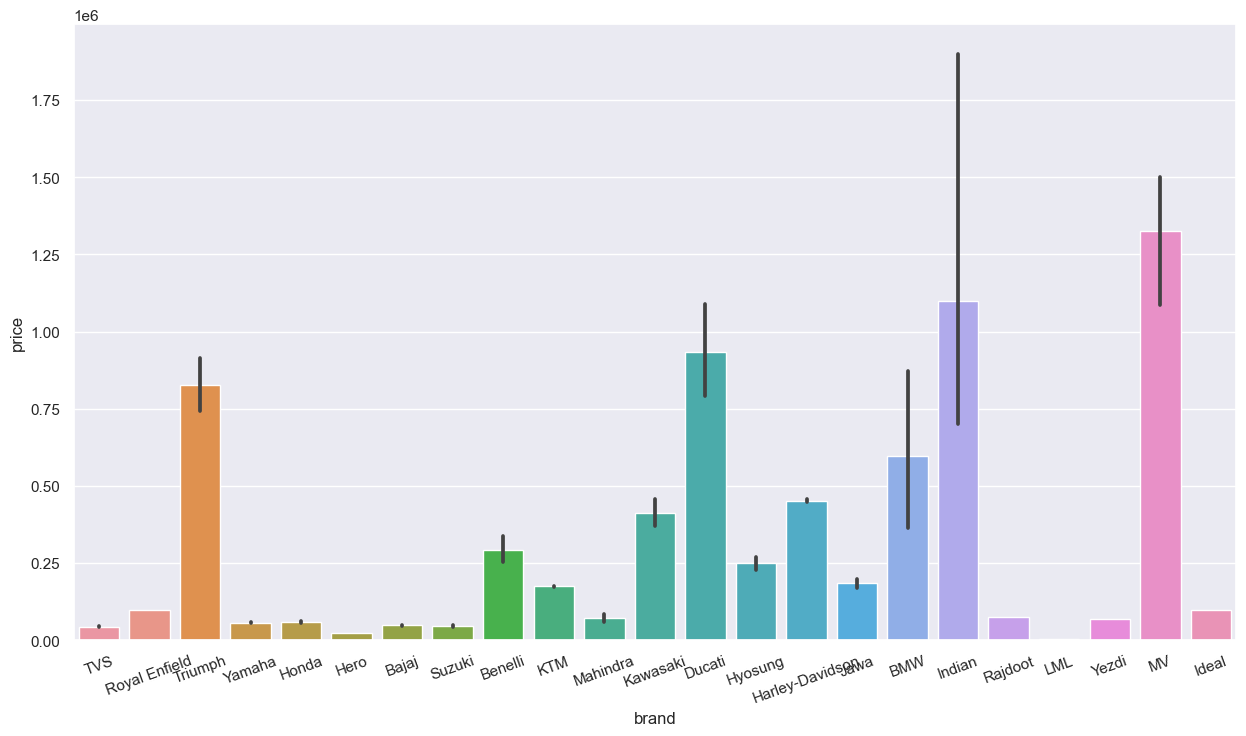

In [49]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation=20)
plt.show()

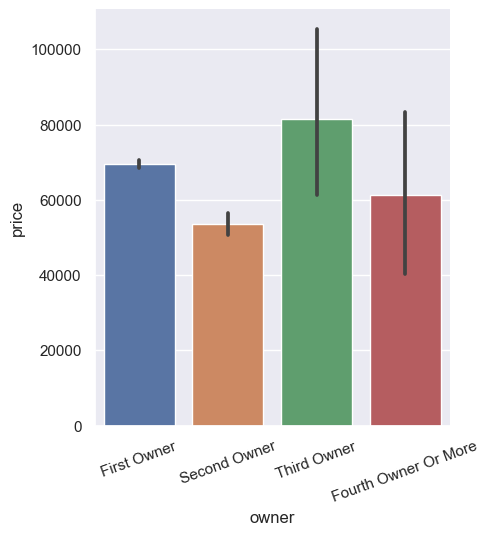

In [50]:
sns.catplot(x='owner',y='price',kind='bar',data=df)   
plt.xticks(rotation=20)
plt.show()

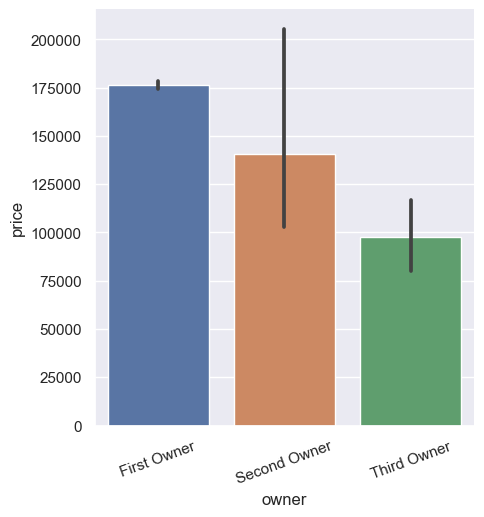

In [51]:
sns.catplot(x='owner',y='price',kind='bar',data=ktm)   # for ktm bike
plt.xticks(rotation=20)
plt.show()

<AxesSubplot: xlabel='owner', ylabel='count'>

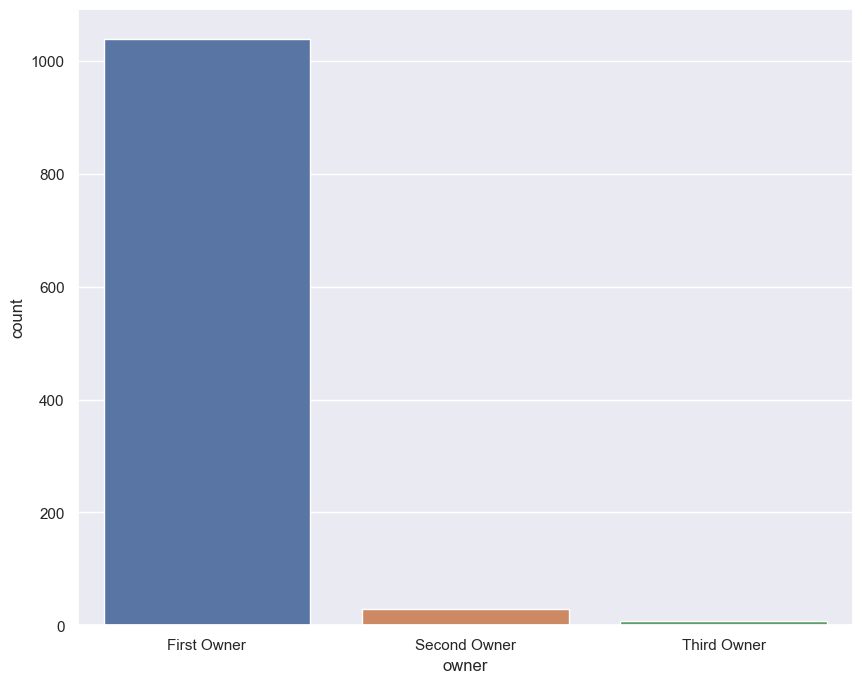

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x='owner',data=df.query("brand=='KTM'"))

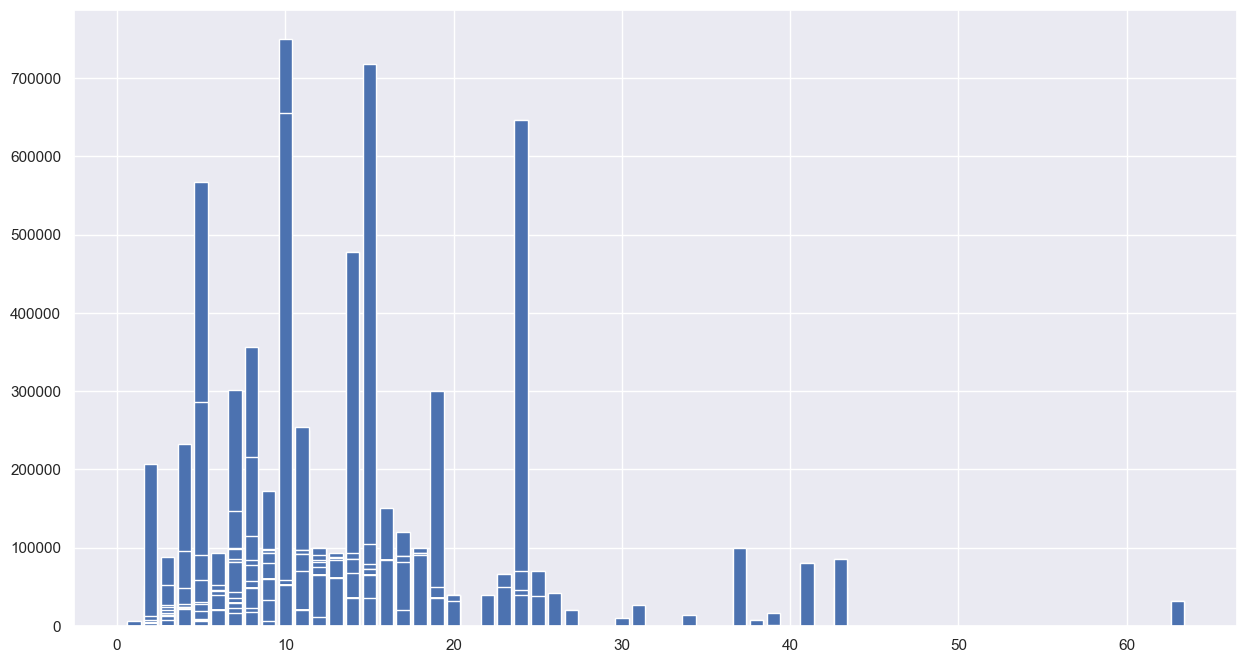

In [53]:
# sns.set(rc={'figure.figsize':(18,10)})
plt.bar(x=df['age'],height=df['kms_driven'])
plt.show()

In [54]:
df[df['age']>60]

,price,city,kms_driven,owner,age,power,brand
6689,70000.0,Delhi,32000.0,Second Owner,63.0,350.0,Royal Enfield
6818,70000.0,Delhi,32000.0,Second Owner,63.0,350.0,Royal Enfield


In [55]:
df[(df['age']>=44)&(df['age']<=60)]      # there is no record in between this range

,price,city,kms_driven,owner,age,power,brand


In [56]:
numerical_data.columns

Index(['price', 'kms_driven', 'age', 'power'], dtype='object')

<AxesSubplot: >

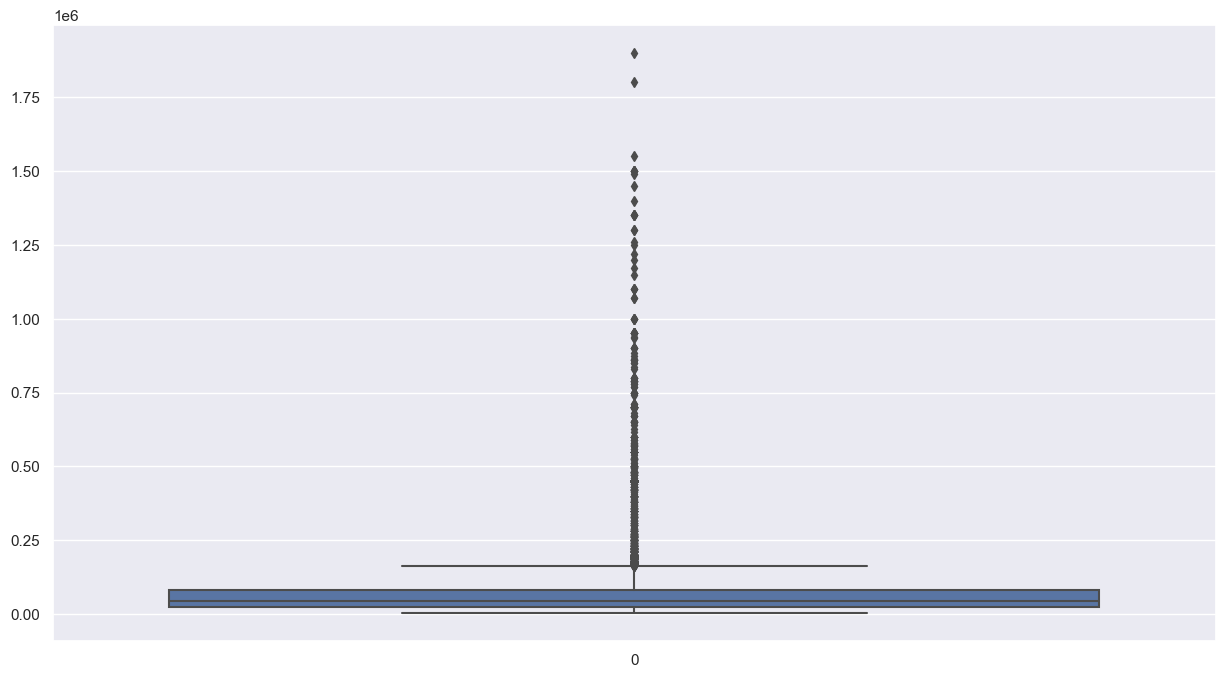

In [57]:
sns.boxplot(df['price'])

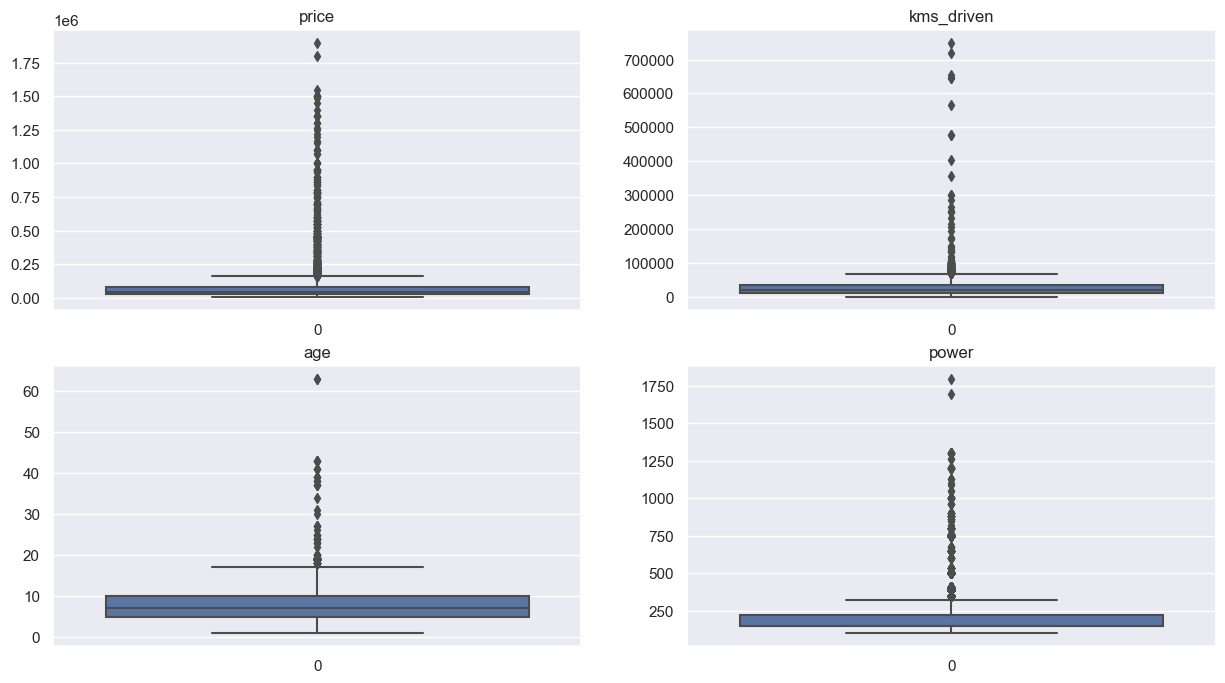

In [58]:
for i , colum in enumerate(numerical_data.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[colum])
    plt.title(colum)
#     print(i,colum)

In [59]:
numerical_data['age'].max()

63.0

## data cleaning 

In [60]:
df.dtypes

price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [61]:
df['age']=df['age'].astype(int)

In [62]:
df.dtypes

price         float64
city           object
kms_driven    float64
owner          object
age             int32
power         float64
brand          object
dtype: object

In [63]:
df['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [64]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,First Owner,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,First Owner,4,180.0,TVS
4,80000.0,Bangalore,10000.0,First Owner,3,150.0,Yamaha


In [65]:
dic={'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth Owner Or More':4}

df['owner']=df['owner'].map(dic)

In [66]:
df['owner']

0        1
1        1
2        1
3        1
4        1
        ..
32643    1
32644    1
32645    1
32646    1
32647    1
Name: owner, Length: 32648, dtype: int64

In [67]:
df['owner'].value_counts()

1    29964
2     2564
3      108
4       12
Name: owner, dtype: int64

In [68]:
ser=df['city'].value_counts()
ser[ser>10].keys()

Index(['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Rupnagar',
       'Allahabad', 'Gurgaon', 'Godhara', 'Faridabad', 'Kadapa', 'Perumbavoor',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Tiruvallur', 'Guwahati',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Kalyan', 'Nashik', 'Ranchi',
       'Udaipur', 'Rohtak', 'Agra', 'Kota', 'Gorakhpur', '24 Pargana',
       'Ernakulam', 'Gandhinagar', 'Meerut'],
      dtype='object')

In [69]:
city_name=['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Allahabad',
       'Rupnagar', 'Gurgaon', 'Godhara', 'Faridabad', 'Perumbavoor', 'Kadapa',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Guwahati', 'Tiruvallur',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Nashik', 'Ranchi', 'Kalyan',
       'Rohtak', 'Udaipur', 'Gorakhpur', 'Agra', 'Kota', '24 Pargana',
       'Meerut', 'Gandhinagar', 'Ernakulam']
maxc_ten_bike = df[df['city'].isin(city_name)]
maxc_ten_bike.head() 
# these are all city data that having at least 10 bikes

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [70]:
maxc_ten_bike['city'].value_counts().shape[0]              # total 60 city available in my data

60

In [71]:
bikes_name=df['brand'].value_counts()
most_available_bikes=bikes_name[bikes_name>10].keys()
greater_than_ten_bike=maxc_ten_bike[maxc_ten_bike['brand'].isin(most_available_bikes)]
greater_than_ten_bike.head()
# these are all bikes records that available numbers of greater than 10

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [72]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [73]:
bike_encoding_dict={'Bajaj':3, 'Hero':16, 'Royal Enfield':1, 'Yamaha':5, 'Honda':6, 'Suzuki':7, 'TVS':8,
       'KTM':2, 'Harley-Davidson':4, 'Kawasaki':9, 'Hyosung':10, 'Benelli':11, 'Mahindra':12,
       'Triumph':13, 'Ducati':14, 'BMW':15}
df['brand']=df['brand'].map(bike_encoding_dict)
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8.0
1,119900.0,Delhi,11000.0,1,4,350.0,1.0
2,600000.0,Delhi,110.0,1,8,675.0,13.0
3,65000.0,Bangalore,16329.0,1,4,180.0,8.0
4,80000.0,Bangalore,10000.0,1,3,150.0,5.0


In [74]:
df[df['brand']==12].head()

,price,city,kms_driven,owner,age,power,brand
47,28000.0,Jaipur,45000.0,1,2,110.0,12.0
427,145000.0,Thane,16000.0,1,5,300.0,12.0
474,18999.0,Pune,38669.0,3,6,110.0,12.0
475,17800.0,Malout,10000.0,1,8,110.0,12.0
935,175000.0,Delhi,8000.0,1,3,300.0,12.0


# TO check the correlation in between independent and dependent feature

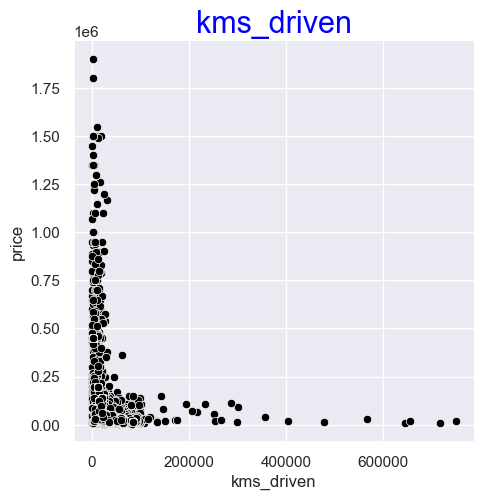

In [75]:
sns.relplot(x='kms_driven',y='price',data=df,color='black')            #,hue='age',
plt.title('kms_driven',fontdict={'fontsize':22,'color':'blue'})
plt.show()

In [76]:
numerical_data.columns

Index(['price', 'kms_driven', 'age', 'power'], dtype='object')

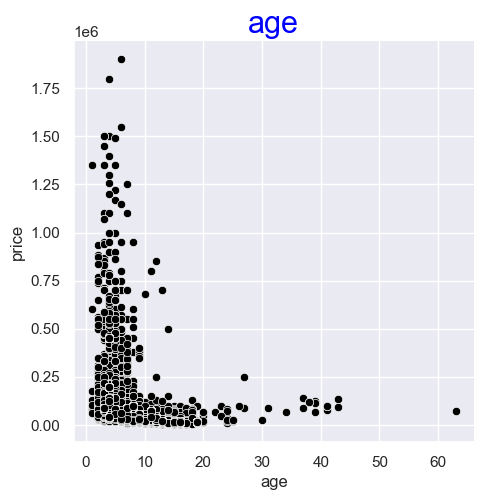

In [77]:
sns.relplot(x='age',y='price',data=df,color='black')            
plt.title('age',fontdict={'fontsize':22,'color':'blue'})
plt.show()

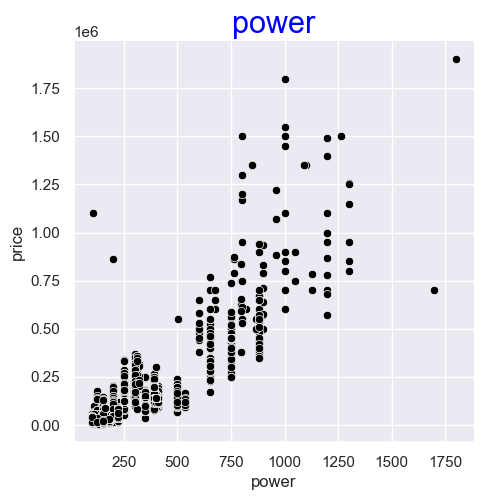

In [78]:
# positive relation
sns.relplot(x='power',y='price',data=df,color='black')            #,hue='age',
plt.title('power',fontdict={'fontsize':22,'color':'blue'})
plt.show()

In [79]:
df.corr()

,price,kms_driven,owner,age,power,brand
price,1.000000,-0.313955,-0.040164,-0.399133,0.862376,-0.219292
kms_driven,-0.313955,1.000000,-0.013661,0.484684,-0.264016,0.108308
owner,-0.040164,-0.013661,1.000000,0.292523,0.044031,0.005500
age,-0.399133,0.484684,0.292523,1.000000,-0.337035,0.295370
power,0.862376,-0.264016,0.044031,-0.337035,1.000000,-0.430012
brand,-0.219292,0.108308,0.005500,0.295370,-0.430012,1.000000


<AxesSubplot: >

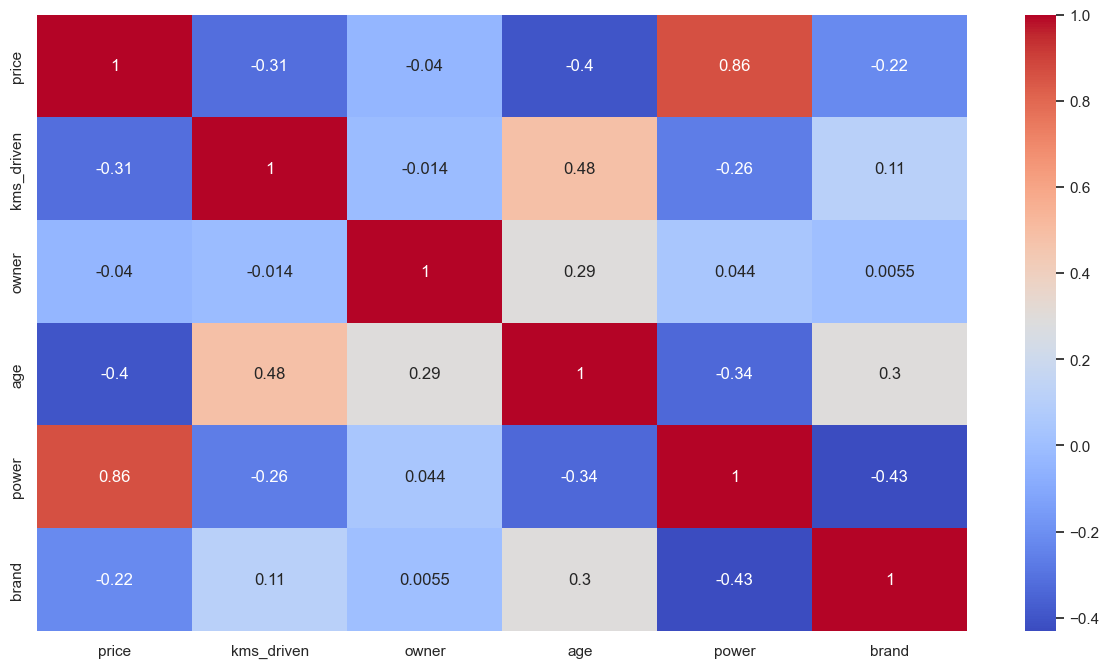

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot: >

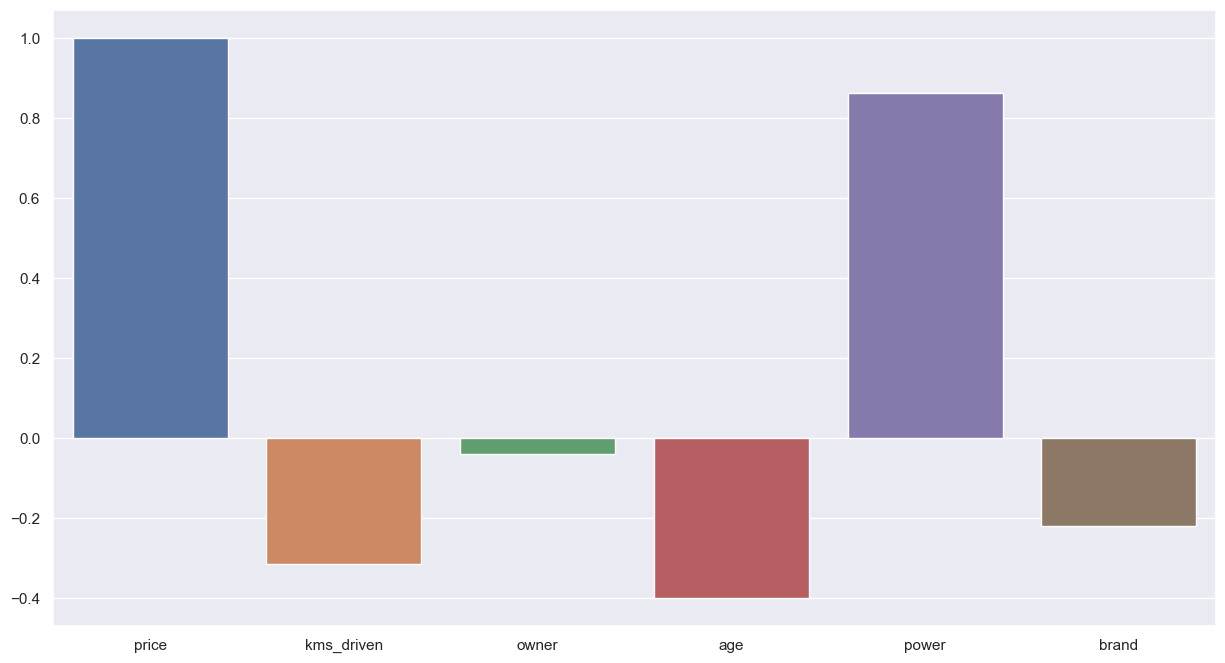

In [81]:
sns.barplot(x = df.corr()['price'].keys(),y=df.corr()['price'].values)

<AxesSubplot: xlabel='power', ylabel='power'>

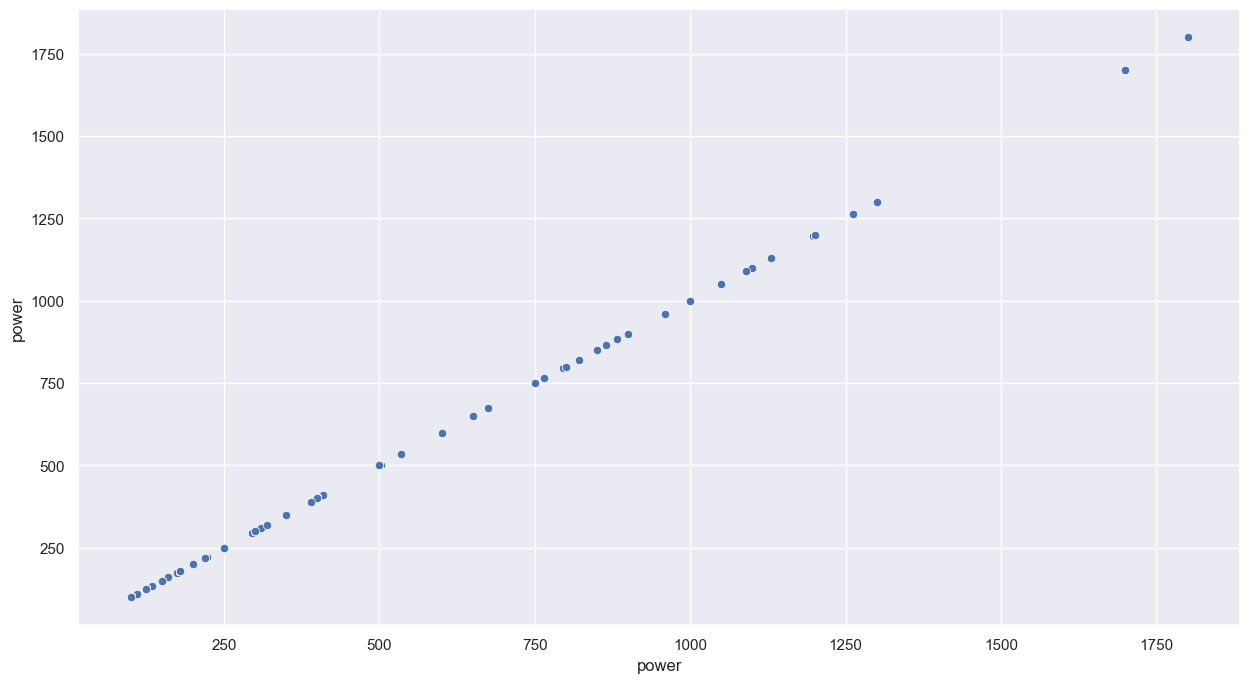

In [82]:
sns.scatterplot(x='power',y='power',data=df)

<AxesSubplot: xlabel='age', ylabel='power'>

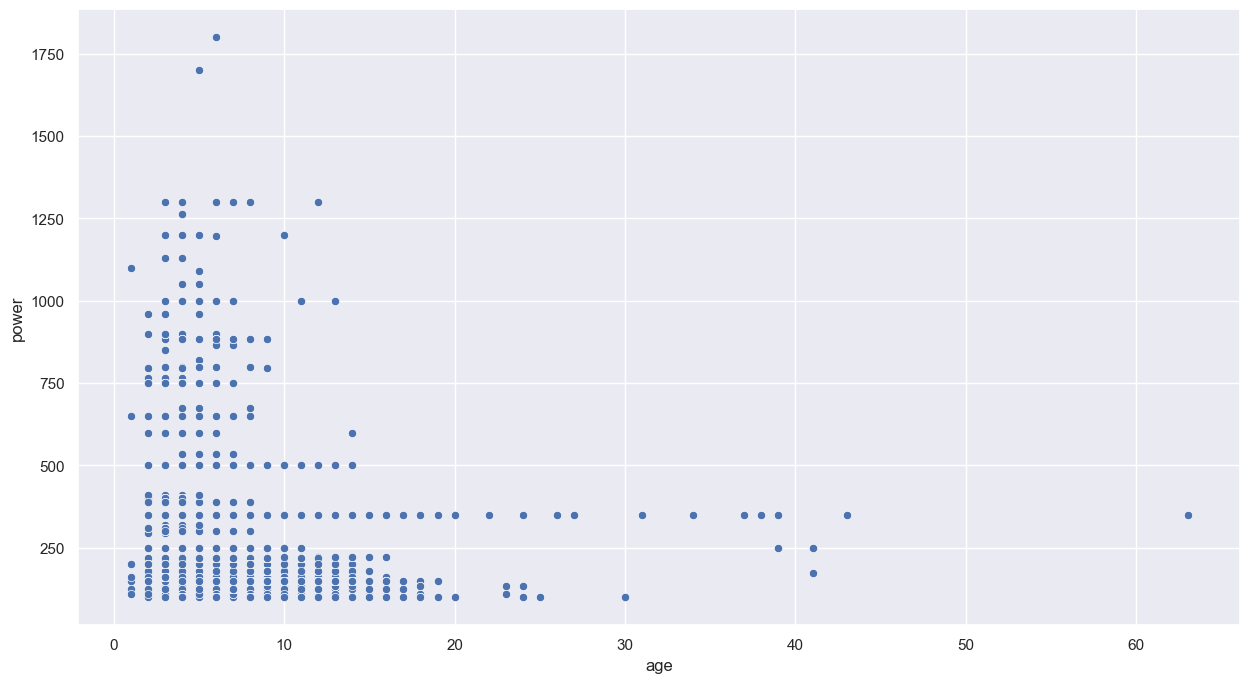

In [83]:
sns.scatterplot(x='age',y='power',data=df)

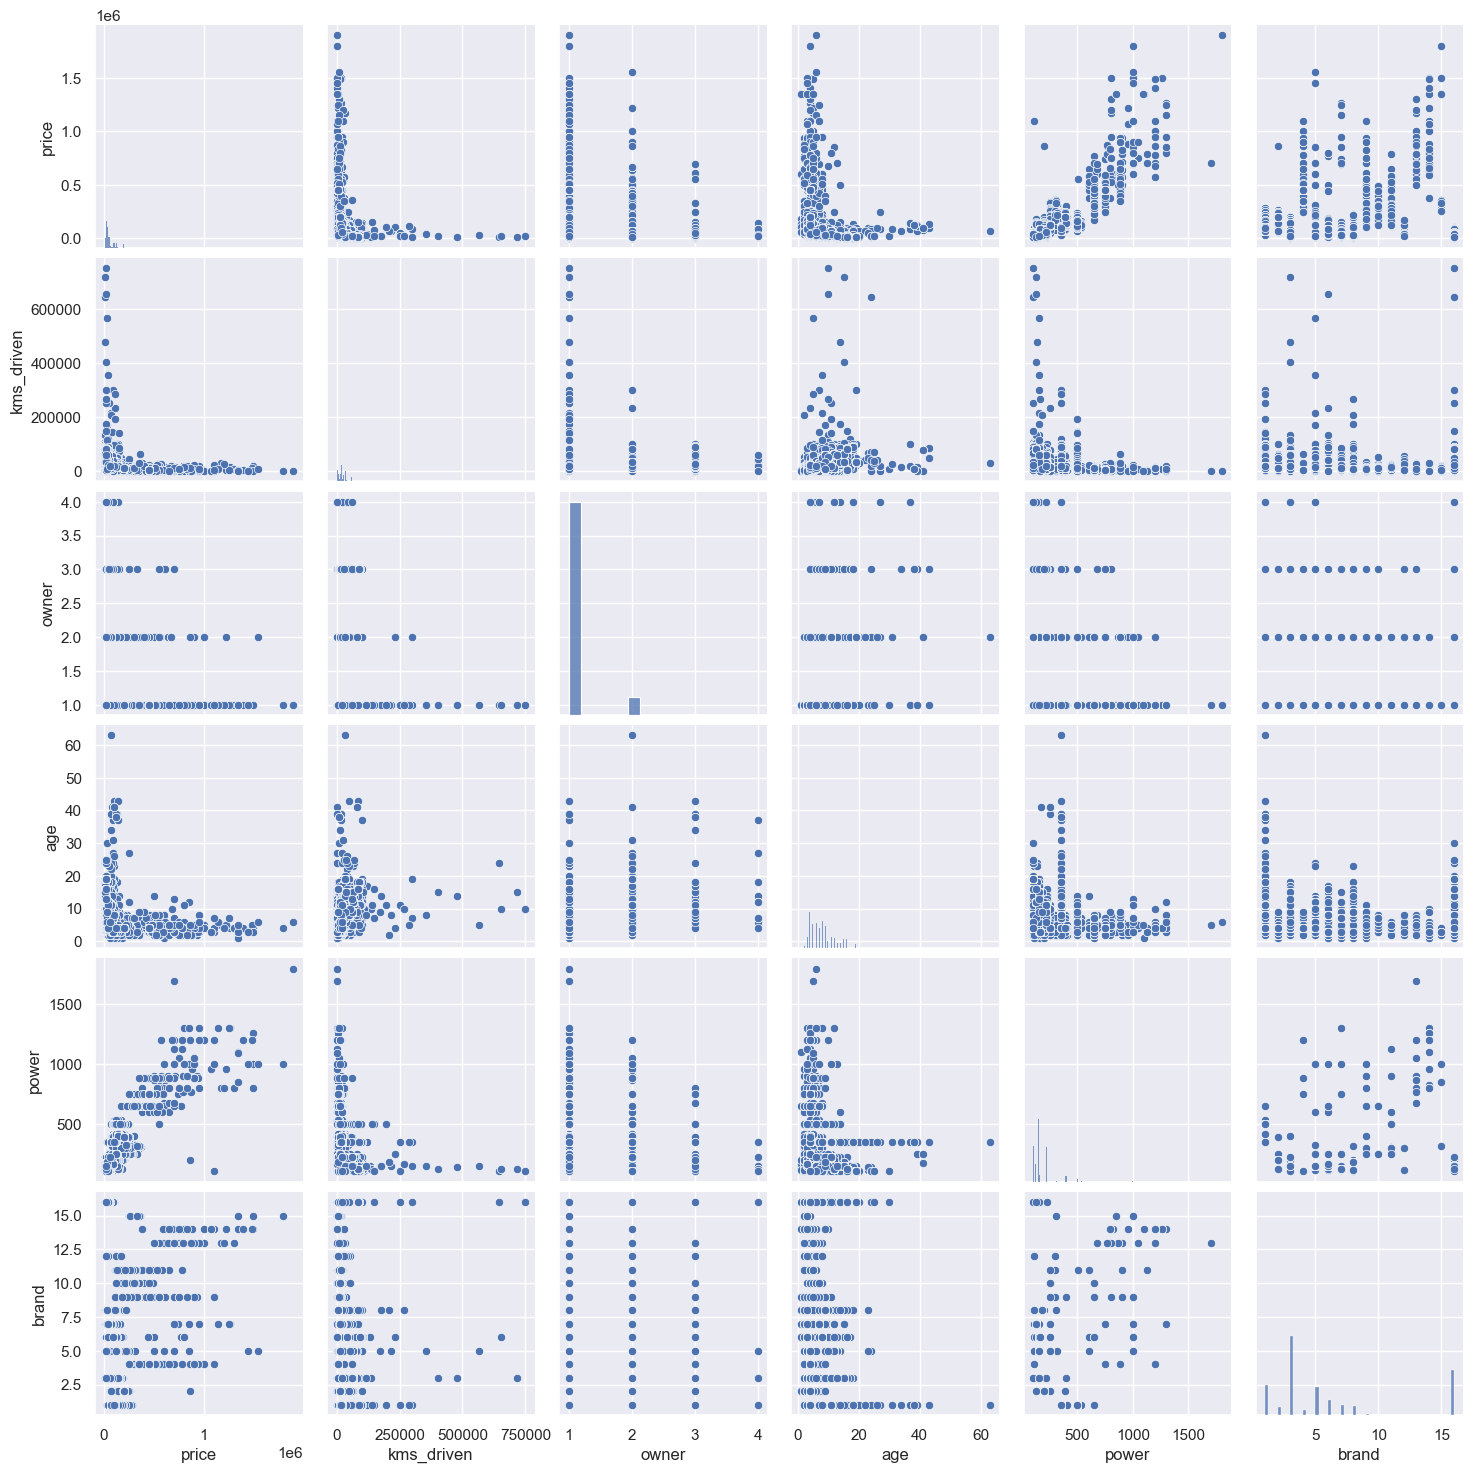

In [84]:
sns.pairplot(df)

## to remove the outliers by IQR method

In [85]:
# from kms_driven feature
lower_limit = dict()
uper_limit = dict()

for colum in numerical_data.columns:
    q1,q3=df[colum].quantile([.25,.75])
    IQR=q3-q1
    LL=q1-1.5*(IQR)
    UL=q3+1.5*(IQR)
    lower_limit[colum]=LL
    uper_limit[colum]=UL
    

In [86]:
lower_limit

{'price': -57500.0, 'kms_driven': -22500.0, 'age': -2.5, 'power': 45.0}

In [87]:
uper_limit

{'price': 162500.0, 'kms_driven': 69500.0, 'age': 17.5, 'power': 325.0}

In [88]:
removed_outliers = df[(df['price']>-57500.0)&(df['price']<162500.0)]
removed_outliers.shape[0]

30707

<AxesSubplot: >

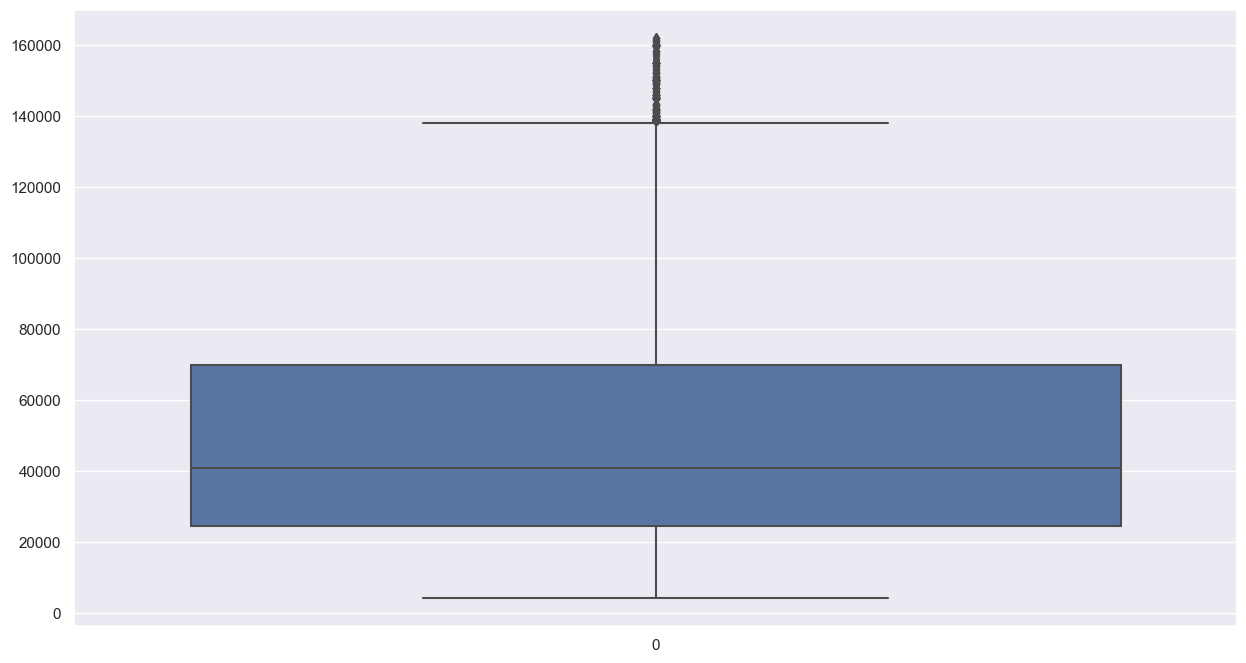

In [89]:
sns.boxplot(removed_outliers['price'])

In [90]:
df[(df['age']>2.5)&(df['age']<17.5)].shape

(31568, 7)

In [91]:
df.shape

(32648, 7)

<AxesSubplot: >

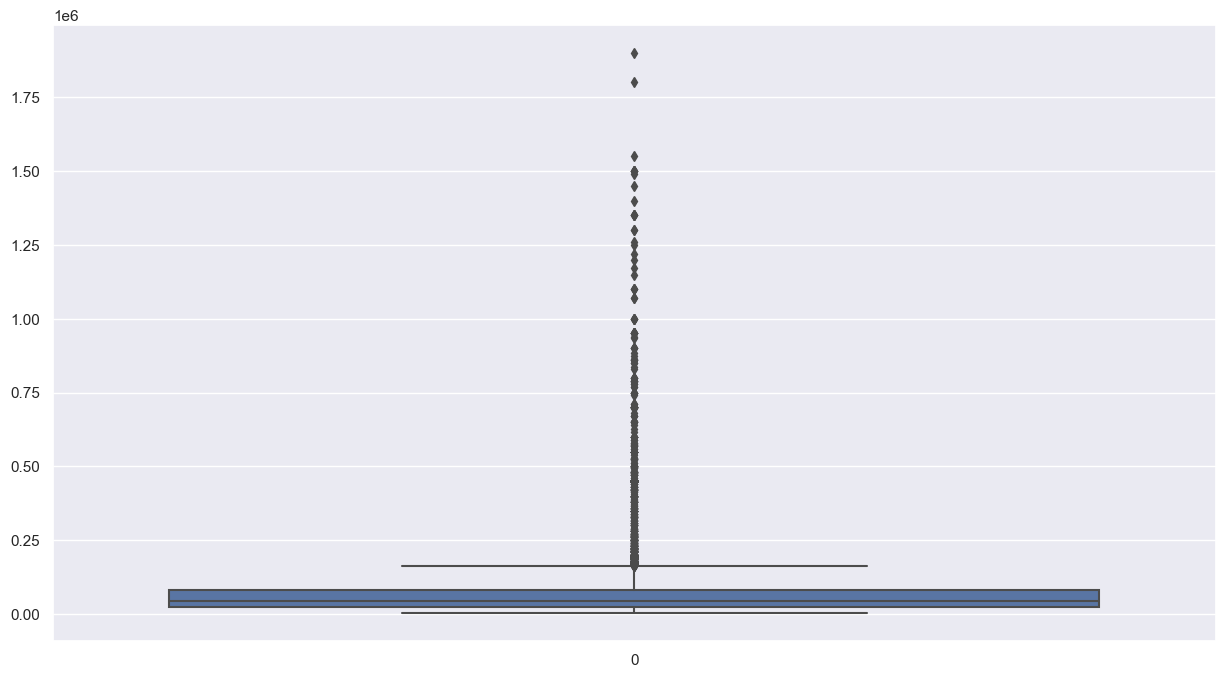

In [92]:
sns.boxplot(df[df['price']>-57500.0]['price'])

In [93]:
df[df['age']<57500.0]['price']

0         35000.0
1        119900.0
2        600000.0
3         65000.0
4         80000.0
           ...   
32643     39000.0
32644     30000.0
32645     60000.0
32646     15600.0
32647     22000.0
Name: price, Length: 32648, dtype: float64

In [94]:
df[df['price']<UL]

,price,city,kms_driven,owner,age,power,brand


In [95]:
LL

45.0

In [96]:
UL

325.0

In [ ]:
df4_rm_outlrs_in_driven=df[df['kms_driven']<uper_limit['kms_driven']]
df4_rm_outlrs_in_driven.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8.0
1,119900.0,Delhi,11000.0,1,4,350.0,1.0
2,600000.0,Delhi,110.0,1,8,675.0,13.0
3,65000.0,Bangalore,16329.0,1,4,180.0,8.0
4,80000.0,Bangalore,10000.0,1,3,150.0,5.0


In [ ]:
df4_rm_outlrs_in_driven.shape

(31763, 7)

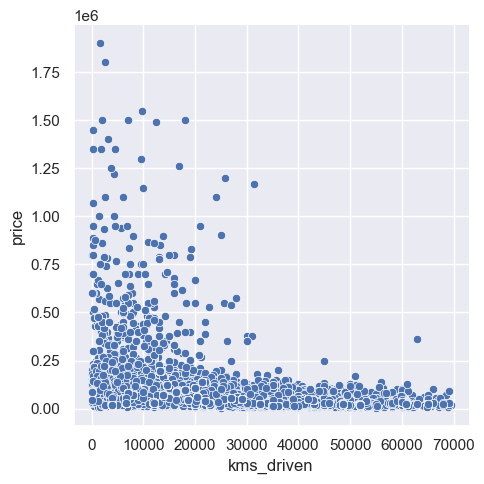

In [ ]:
sns.relplot(x='kms_driven',y='price',data=df4_rm_outlrs_in_driven)
# you can see now

In [ ]:
df4_rm_outlrs_in_driven.shape

(31763, 7)

<AxesSubplot: >

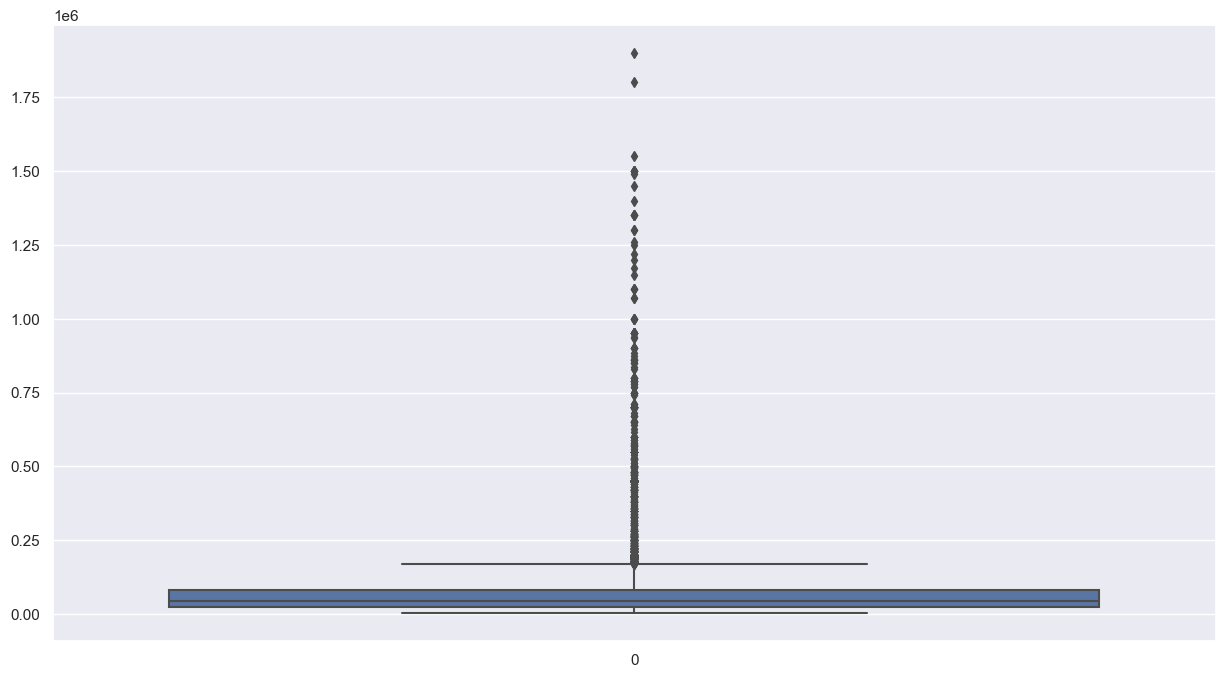

In [ ]:
sns.boxplot(df4_rm_outlrs_in_driven['price'])
# i am going to remove outliers in price feature

In [ ]:
q1,q3=df4_rm_outlrs_in_driven['price'].quantile([.25,.75])
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)

In [ ]:
LL

-62000.0

In [ ]:
UL

170000.0

<AxesSubplot: >

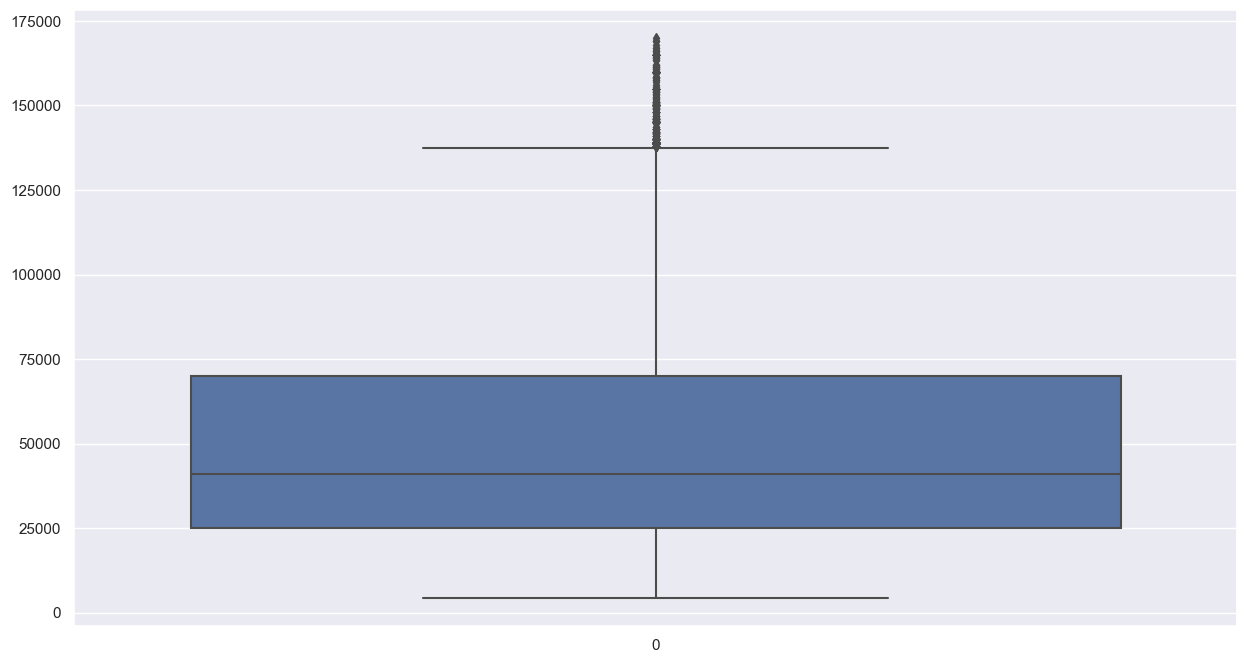

In [ ]:
sns.boxplot(df4_rm_outlrs_in_driven[df4_rm_outlrs_in_driven['price']<UL]['price'])

In [ ]:
df5=df4_rm_outlrs_in_driven[df4_rm_outlrs_in_driven['price']<UL]
df5.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8.0
1,119900.0,Delhi,11000.0,1,4,350.0,1.0
3,65000.0,Bangalore,16329.0,1,4,180.0,8.0
4,80000.0,Bangalore,10000.0,1,3,150.0,5.0
5,53499.0,Delhi,25000.0,1,6,150.0,5.0


## set the variable for ML model

In [ ]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8.0
1,119900.0,Delhi,11000.0,1,4,350.0,1.0
2,600000.0,Delhi,110.0,1,8,675.0,13.0
3,65000.0,Bangalore,16329.0,1,4,180.0,8.0
4,80000.0,Bangalore,10000.0,1,3,150.0,5.0


In [ ]:
df = df.drop(['city'],axis=1)
df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3,110.0,8.0
1,119900.0,11000.0,1,4,350.0,1.0
2,600000.0,110.0,1,8,675.0,13.0
3,65000.0,16329.0,1,4,180.0,8.0
4,80000.0,10000.0,1,3,150.0,5.0


In [ ]:
df.isnull().sum().sum()

22

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
x =df.drop(['price'],axis=1)       # independent variable  or input
y =df['price']                      # dependent variable   or output

In [ ]:
x

,kms_driven,owner,age,power,brand
0,17654.0,1,3,110.0,8.0
1,11000.0,1,4,350.0,1.0
2,110.0,1,8,675.0,13.0
3,16329.0,1,4,180.0,8.0
4,10000.0,1,3,150.0,5.0
...,...,...,...,...,...
32643,22000.0,1,4,100.0,16.0
32644,6639.0,1,9,180.0,8.0
32645,20373.0,1,6,220.0,3.0
32646,84186.0,1,16,125.0,16.0


In [ ]:
y

0         35000.0
1        119900.0
2        600000.0
3         65000.0
4         80000.0
           ...   
32643     39000.0
32644     30000.0
32645     60000.0
32646     15600.0
32647     22000.0
Name: price, Length: 32626, dtype: float64

In [ ]:
x.head()

,kms_driven,owner,age,power,brand
0,17654.0,1,3,110.0,8.0
1,11000.0,1,4,350.0,1.0
2,110.0,1,8,675.0,13.0
3,16329.0,1,4,180.0,8.0
4,10000.0,1,3,150.0,5.0


In [ ]:
df.shape

(32626, 6)

In [ ]:
x.shape,y.shape

((32626, 5), (32626,))

In [ ]:
from sklearn.model_selection import train_test_split


x_train  ,x_test,   y_train,  y_test =  train_test_split(x,y,test_size=0.2,random_state=31)

In [ ]:
x_train.shape,  x_test.shape,   y_train.shape,   y_test.shape

((26100, 5), (6526, 5), (26100,), (6526,))

In [ ]:
x_train

,kms_driven,owner,age,power,brand
6009,21062.0,1,10,135.0,3.0
30297,13858.0,2,11,350.0,1.0
21490,36000.0,1,15,150.0,3.0
22626,140.0,1,3,160.0,6.0
20614,65000.0,1,12,150.0,5.0
...,...,...,...,...,...
14968,8000.0,1,5,220.0,3.0
27540,34968.0,1,14,150.0,16.0
26662,7127.0,1,5,220.0,3.0
32365,27000.0,1,9,150.0,5.0


In [ ]:
y_train

6009     21000.0
30297    70000.0
21490    14227.0
22626    87000.0
20614    25000.0
          ...   
14968    70000.0
27540    11900.0
26662    80000.0
32365    55000.0
21224    39000.0
Name: price, Length: 26100, dtype: float64

In [ ]:
round(x_train.shape[0]/df.shape[0]*100)           # percentage of training data

80

In [ ]:
round(x_test.shape[0]/df.shape[0]*100)           # percentage of testing data

20

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lr   =     LinearRegression()

lr.fit(x_train,y_train)         # training


LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.8010273251969532

### Lasso

In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.8010273839551342

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.8010274020995074

### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

0.9555167517567009

In [ ]:
from sklearn import tree

[Text(0.789282421497144, 0.984375, 'x[3] <= 567.5\nsquared_error = 7935507057.109\nsamples = 26100\nvalue = 68286.779'),
 Text(0.5946305316704608, 0.953125, 'x[3] <= 236.5\nsquared_error = 1920318240.781\nsamples = 25347\nvalue = 55820.079'),
 Text(0.32685126203359083, 0.921875, 'x[2] <= 5.5\nsquared_error = 616858530.642\nsamples = 19987\nvalue = 38880.889'),
 Text(0.07468365119241267, 0.890625, 'x[3] <= 142.0\nsquared_error = 937272100.96\nsamples = 4632\nvalue = 65842.964'),
 Text(0.02083387908695714, 0.859375, 'x[4] <= 2.5\nsquared_error = 1130840390.773\nsamples = 1140\nvalue = 41094.931'),
 Text(0.0007249968139788448, 0.828125, 'x[0] <= 575.0\nsquared_error = 274224100.0\nsamples = 10\nvalue = 138930.0'),
 Text(0.0003624984069894224, 0.796875, 'x[2] <= 1.5\nsquared_error = 169000000.0\nsamples = 2\nvalue = 165000.0'),
 Text(0.0001812492034947112, 0.765625, 'squared_error = 0.0\nsamples = 1\nvalue = 178000.0'),
 Text(0.0005437476104841336, 0.765625, 'squared_error = 0.0\nsamples =

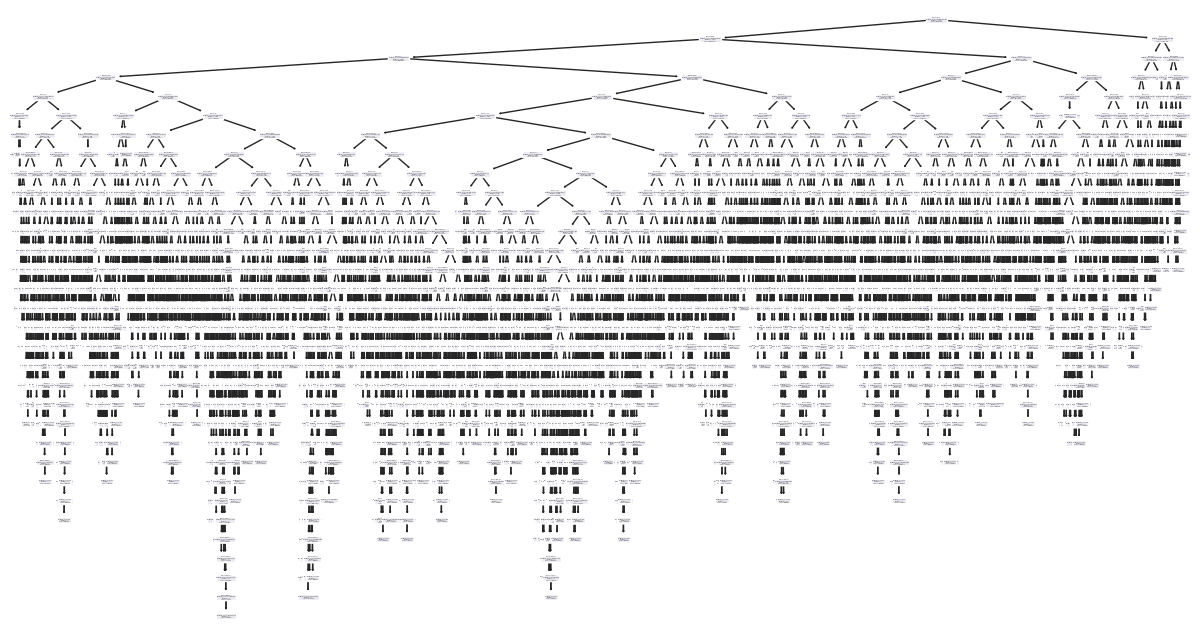

In [ ]:
tree.plot_tree(dtr)

### SVR

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

-0.050856956087770966

### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8416311741824815

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.9697366857819629

### ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_test,y_test)

0.9768012738621865

# with scaled data 

In [ ]:
[1,2,3,4,5,200]


[1, 2, 3, 4, 5, 200]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_sc,y_train)
lr.score(x_test_sc,y_test)

0.8010273251969535

In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train_sc,y_train)
ls.score(x_test_sc,y_test)

0.8010265308155203

In [ ]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x_train_sc,y_train)
rdg.score(x_test_sc,y_test)

0.8010255884050548

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train_sc,y_train)
dtr.score(x_test_sc,y_test)

0.9537455458079949

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_sc,y_train)
svr.score(x_test_sc,y_test)

-0.04702690698099388

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train_sc,y_train)
knn.score(x_test_sc,y_test)

0.9567150259162464

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr2=RandomForestRegressor()
rfr2.fit(x_train_sc,y_train)
rfr2.score(x_test_sc,y_test)

0.9706738232276265

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train_sc,y_train)
etr.score(x_test_sc,y_test)

0.9756767949343866

# you can see here all accuracy of algorithium

In [ ]:
acuracy=pd.DataFrame({'Algorithium':['linear','laso','ridge','decisionTree','KNN','SVR','RandomForest','ETR'],
                     'acuracy_no_scl':[8006,8006,8006,9568,9042,-0.060,9694,9694],
                     'accuracy_with_scl':[8006,8006,8006,9577,9610,.0281,9701,9692]})
acuracy


,Algorithium,acuracy_no_scl,accuracy_with_scl
0,linear,8006.00,8006.0000
1,laso,8006.00,8006.0000
2,ridge,8006.00,8006.0000
3,decisionTree,9568.00,9577.0000
4,KNN,9042.00,9610.0000
5,SVR,-0.06,0.0281
6,RandomForest,9694.00,9701.0000
7,ETR,9694.00,9692.0000


In [ ]:
acuracy.sort_values(by='accuracy_with_scl',ascending=False)

,Algorithium,acuracy_no_scl,accuracy_with_scl
6,RandomForest,9694.00,9701.0000
7,ETR,9694.00,9692.0000
4,KNN,9042.00,9610.0000
3,decisionTree,9568.00,9577.0000
0,linear,8006.00,8006.0000
1,laso,8006.00,8006.0000
2,ridge,8006.00,8006.0000
5,SVR,-0.06,0.0281


# HYPER PARAMETER TUNING
hypere parametere just for undertanding , because i have already good accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=3,num=6)]
min_samples_split=[2,5,10,12,100]
min_samples_leaf=[1,2,5,10]

In [ ]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [ ]:
rdm_rand_forest=RandomizedSearchCV(estimator=rfr2,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,scoring='neg_mean_squared_error')

In [ ]:
rdm_rand_forest.fit(x_train_sc,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=281; total time=   4.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=281; total time=   4.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=281; total time=   3.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=281; total time=   4.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=281; total time=   3.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=390; total time=   5.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=390; total time=   5.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=390

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 4, 4, 3, 3, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 12,
                                                              100],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
y_pred =  rfr.predict(x_test)



In [ ]:
y_pred

array([ 52988.14,  30290.  ,  84528.  , ..., 312909.25,  25000.  ,
       450000.  ])

In [ ]:
y_pred.shape            # by machine

(6526,)

In [ ]:
y_test.shape            # actually

(6526,)

In [ ]:
y_test[10:20]

27836     14227.0
11507     35000.0
31232    123000.0
10214     18000.0
15704     87000.0
6873      38000.0
29878     87000.0
27683     18000.0
17993     18000.0
31374     80000.0
Name: price, dtype: float64

In [ ]:
for i in y_pred[10:20]:
    print(i)

14227.0
35000.0
123000.0
18000.0
87000.0
43529.56
87000.0
18000.0
18000.0
80000.0


# model testing 

In [ ]:
rfr2.score(x_test_sc,y_test)         #     this is my best model
# randomforest with scaled dataa

0.9706738232276265

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9697366857819629

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

235246561.8025426

In [ ]:
np.sqrt(mse)

15337.74956773459

In [ ]:
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(rfr2,x_train,y_train)
print('cross validation value :- ',cross_validation)
print()
print(cross_validation.mean())

cross validation value :-  [0.96534913 0.97353504 0.94306323 0.95475589 0.97003506]

0.9613476688431202


In [ ]:
cross_validation.mean()         # cross validation mean average score

0.9613476688431202

In [ ]:
y_pred

array([ 52988.14,  30290.  ,  84528.  , ..., 312909.25,  25000.  ,
       450000.  ])

In [ ]:
y_pred2=rfr.predict(x_test)

In [ ]:
y_test['predicted_value_without_scl']=y_pred2

In [ ]:
y_test

1041                                                                     55000.0
3848                                                                     27000.0
6119                                                                     70000.0
6677                                                                    150000.0
26010                                                                    25000.0
                                                     ...                        
1773                                                                     35000.0
69                                                                      290000.0
28119                                                                    25000.0
21245                                                                   450000.0
predicted_value_without_scl    [52988.14, 30290.0, 84528.0, 148459.02, 25000....
Name: price, Length: 6527, dtype: object

# SAVE THE MODEL

In [ ]:
import pickle

In [ ]:
pickle.dump(rfr,open('bike_price_prediction.pkl','wb'))

In [ ]:
model2 =  pickle.load(open('bike_price_prediction.pkl','rb'))

In [ ]:
import numpy as np

In [ ]:
pd.DataFrame(np.array([[2500,2,3,25,1]]))

,0,1,2,3,4
0,2500,2,3,25,1


In [ ]:
model2.predict([[2852,2,1,100,4]])

array([43926.])

In [ ]:
x_train.head()

,kms_driven,owner,age,power,brand
6009,21062.0,1,10,135.0,3.0
30297,13858.0,2,11,350.0,1.0
21490,36000.0,1,15,150.0,3.0
22626,140.0,1,3,160.0,6.0
20614,65000.0,1,12,150.0,5.0


In [ ]:
df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3,110.0,8.0
1,119900.0,11000.0,1,4,350.0,1.0
2,600000.0,110.0,1,8,675.0,13.0
3,65000.0,16329.0,1,4,180.0,8.0
4,80000.0,10000.0,1,3,150.0,5.0


In [ ]:
prediction=model2.predict([[2500,2,3,25,1]])

In [ ]:
prediction

array([164088.])

In [ ]:
str(round(prediction[0],2))

'164088.0'

In [ ]:
model2.predict([[11000,1,4,350,1]])

array([128975.11190476])